In [4]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import tf_keras as keras
import platform

In [5]:
gpus = tf.config.list_physical_devices('GPU')

In [6]:
import cv2
import imghdr

/var/folders/zf/gvx8p5px6p18ld2x8r73f3940000gn/T/ipykernel_88004/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = "/Users/tadiostilahun/visoal studio/data002"
image_exts = ["jpeg", "jpg", "bmp", "png"]
file = '.DS_Store'
location = '/Users/tadiostilahun/visoal studio/data002/'
'''path = os.path.join(location, file)
os.remove(path)'''

'path = os.path.join(location, file)\nos.remove(path)'

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

NotADirectoryError: [Errno 20] Not a directory: '/Users/tadiostilahun/visoal studio/data002/test_dog.jpg'

In [10]:
data = tf.keras.preprocessing.image_dataset_from_directory('/Users/tadiostilahun/visoal studio/data002')

Found 1328 files belonging to 2 classes.


In [11]:
data_literator = data.as_numpy_iterator()

In [12]:
batch = data_literator.next()

In [13]:
batch[0].shape

(32, 256, 256, 3)

In [14]:
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int32)

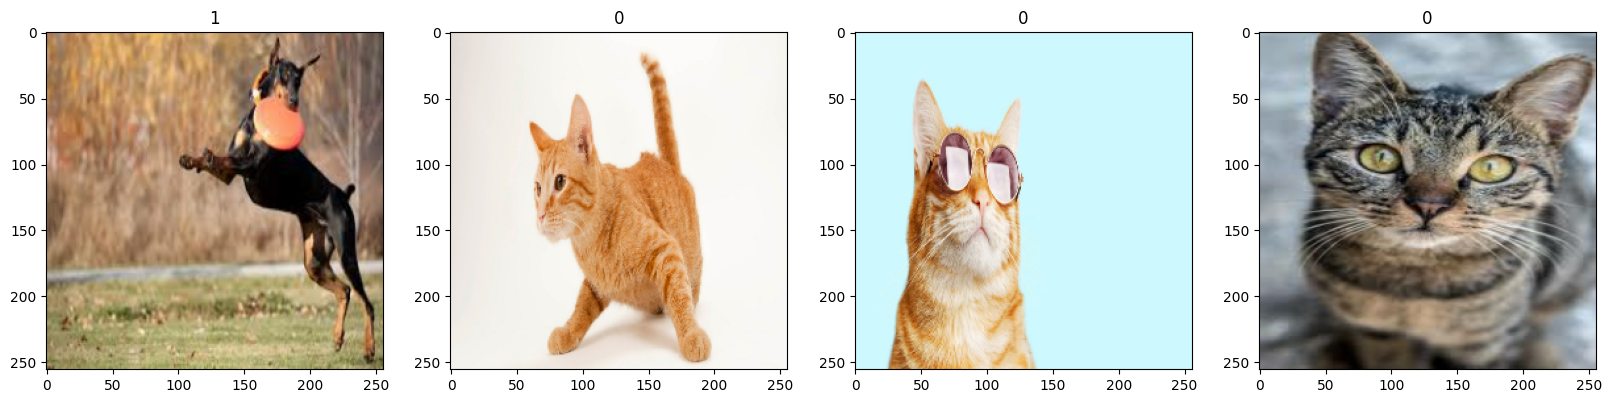

In [15]:
fig, ax = plt.subplots(ncols= 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
batch[0].max()

255.0

In [17]:
data = data.map(lambda x, y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
batch[0].max()

1.0

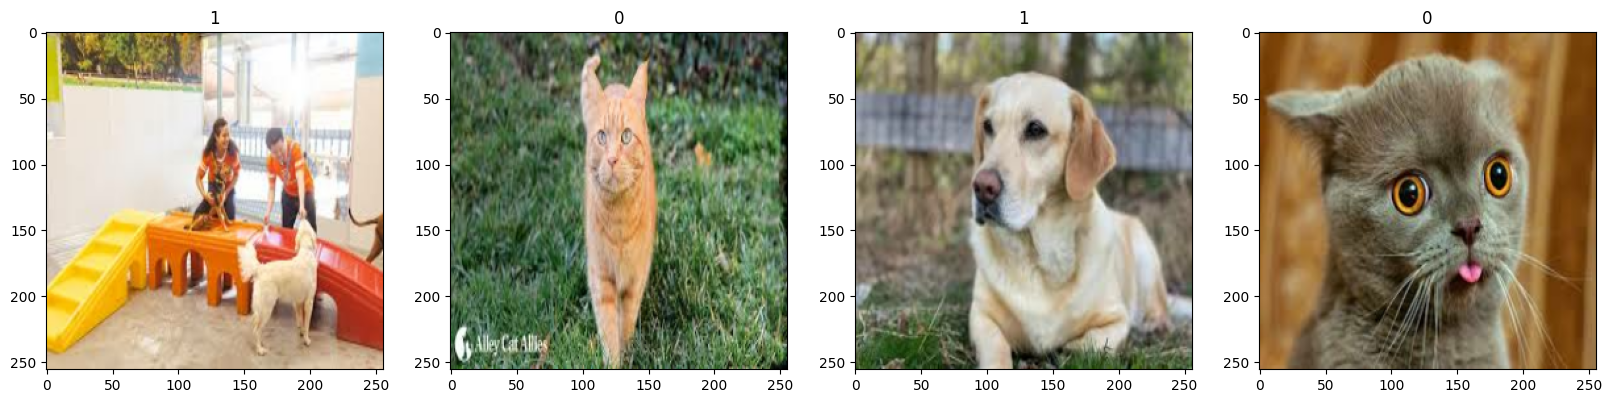

In [21]:
fig, ax = plt.subplots(ncols= 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
len(data)

42

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size, val_size, test_size

(29, 9, 5)

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
len(train), len(val), len(test)

(29, 9, 4)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/tadiostilahun/visoal studio/deep_learning_enviroment/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
logdir = 'logs'

In [33]:
tensorbord_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorbord_callback])

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.5365 - loss: 0.8439 - val_accuracy: 0.6424 - val_loss: 0.6634
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.6604 - loss: 0.6361 - val_accuracy: 0.6910 - val_loss: 0.5758
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.7426 - loss: 0.5147 - val_accuracy: 0.7188 - val_loss: 0.5603
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.8379 - loss: 0.4129 - val_accuracy: 0.7292 - val_loss: 0.5705
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.8876 - loss: 0.2853 - val_accuracy: 0.8021 - val_loss: 0.5431
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.9496 - loss: 0.1735 - val_accuracy: 0.8194 - val_loss: 0.6372
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.9604 - loss: 0.1248 - val_accuracy: 0.8056 - val_loss: 0.5432
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.9728 - loss: 0.0779 - val_accuracy: 0.

In [35]:
hist.history

{'accuracy': [0.5366379022598267,
  0.6799569129943848,
  0.7553879022598267,
  0.8243534564971924,
  0.8793103694915771,
  0.9364224076271057,
  0.9536637663841248,
  0.9741379022598267,
  0.9709051847457886,
  0.975215494632721,
  0.9655172228813171,
  0.9913793206214905,
  0.9903017282485962,
  0.9892241358757019,
  0.9773706793785095,
  0.9849137663841248,
  0.9913793206214905,
  0.9989224076271057,
  0.9989224076271057,
  0.9989224076271057],
 'loss': [0.7487238049507141,
  0.6138142347335815,
  0.5191788077354431,
  0.4039091169834137,
  0.28507381677627563,
  0.21751737594604492,
  0.1416696161031723,
  0.08517925441265106,
  0.07741115987300873,
  0.08914067596197128,
  0.1186448410153389,
  0.038073670119047165,
  0.04100838303565979,
  0.06718004494905472,
  0.06418029218912125,
  0.04449547082185745,
  0.03058444708585739,
  0.009182930923998356,
  0.008598564192652702,
  0.004458659328520298],
 'val_accuracy': [0.6423611044883728,
  0.6909722089767456,
  0.71875,
  0.729166

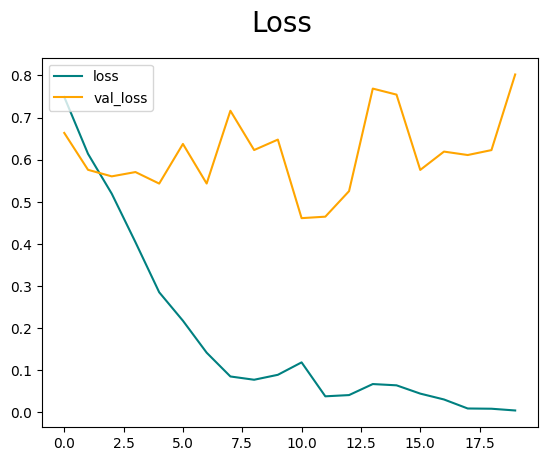

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

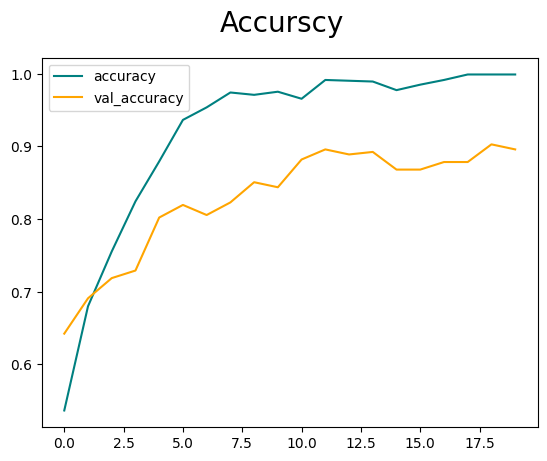

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accurscy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


2024-10-08 12:02:55.203287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [41]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9166666865348816, Recall:0.8870967626571655, Accuracy:0.8928571343421936


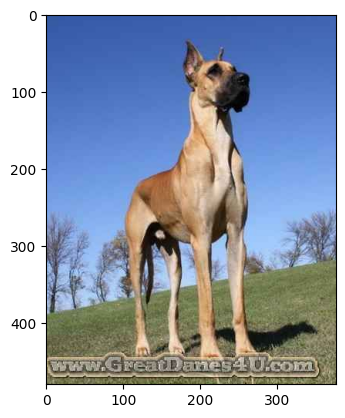

In [42]:
img = cv2.imread('/Users/tadiostilahun/visoal studio/data002/test_dog.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

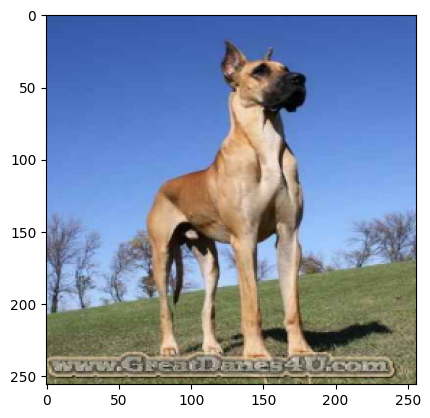

In [43]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
resize.shape

TensorShape([256, 256, 3])

In [45]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [46]:
yhat = model.predict(np.expand_dims(resize/256, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [47]:
yhat

array([[0.99979955]], dtype=float32)

In [48]:
if yhat > 0.5:
    print(f'predicted class is dog.')
else:
    print('predicted class is cat.')

predicted class is dog.


In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models', 'dogcatpridict.h5'))

In [51]:
new_model = load_model(os.path.join('models', 'dogcatpridict.h5'))

In [52]:
new_model.predict(np.expand_dims(resize/256, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.99979955]], dtype=float32)

In [53]:
tf.test.is_gpu_available()

False